In [0]:
import torch

# Tensors

In [2]:
#creating empty tensor
x = torch.empty(2,2,3)
x

tensor([[[5.2418e-36, 0.0000e+00, 0.0000e+00],
         [0.0000e+00, 0.0000e+00, 0.0000e+00]],

        [[0.0000e+00, 0.0000e+00, 2.8026e-45],
         [0.0000e+00, 1.1210e-44, 0.0000e+00]]])

In [3]:
#creating random tensor
x = torch.rand(3)
x

tensor([0.1584, 0.5163, 0.5537])

In [4]:
#create torch with 0 or 1s
x = torch.ones(2,3)
x.dtype

torch.float32

In [5]:
#create your own tensor as you want
x = torch.tensor([2.5,0.1])
x

tensor([2.5000, 0.1000])

In [6]:
#create torch with different types
x = torch.ones(2,3, dtype=torch.int) #doubles, float16 etc...
x.dtype

torch.int32

In [7]:
#check size of a tensor
x.size()

torch.Size([2, 3])

# Basic tensor operations

In [8]:
x = torch.rand(2,2)
y = torch.rand(2,2)
print(x)
print(y)

tensor([[0.3365, 0.7350],
        [0.2881, 0.8531]])
tensor([[0.9568, 0.3192],
        [0.1838, 0.3625]])


In [9]:
z = x + y #element wise addition
z

tensor([[1.2933, 1.0541],
        [0.4719, 1.2156]])

In [10]:
z = torch.add(x,y) #same as top version
z

tensor([[1.2933, 1.0541],
        [0.4719, 1.2156]])

In [11]:
y.add_(x) #_ makes inplace operation - same addition replacing y value x + y
y

tensor([[1.2933, 1.0541],
        [0.4719, 1.2156]])

In [12]:
z = x - y #or z = torch.sub(x,y)
z

tensor([[-0.9568, -0.3192],
        [-0.1838, -0.3625]])

In [13]:
z = x * y #or z = torch.mul(x,y)
z

tensor([[0.4352, 0.7748],
        [0.1359, 1.0370]])

# Slicing example

In [14]:
x = torch.rand(5,3)
x

tensor([[0.3145, 0.9064, 0.4650],
        [0.0687, 0.7879, 0.7986],
        [0.0280, 0.2310, 0.5879],
        [0.4856, 0.4464, 0.3242],
        [0.3877, 0.9108, 0.4046]])

In [15]:
x[:,0] #1st row of the first column

tensor([0.3145, 0.0687, 0.0280, 0.4856, 0.3877])

In [16]:
x[1,:] #2nd row of all columns

tensor([0.0687, 0.7879, 0.7986])

In [17]:
x[1,1] #getting exact value

tensor(0.7879)

# Reshaping tensor

In [18]:
x = torch.rand(4,4)
x

tensor([[0.2737, 0.3189, 0.6497, 0.6191],
        [0.6617, 0.8573, 0.5016, 0.5373],
        [0.4988, 0.4935, 0.3746, 0.2720],
        [0.2299, 0.9461, 0.4888, 0.3515]])

In [19]:
y = x.view(16) #making 1d vector from X, number of elements must be the same
y

tensor([0.2737, 0.3189, 0.6497, 0.6191, 0.6617, 0.8573, 0.5016, 0.5373, 0.4988,
        0.4935, 0.3746, 0.2720, 0.2299, 0.9461, 0.4888, 0.3515])

In [0]:
# Converting from numpy to pytorch tensore

In [0]:
import numpy as np

In [22]:
a = torch.ones(5)
a

tensor([1., 1., 1., 1., 1.])

In [23]:
b = a.numpy() #turninig a into numpy array
print(b)
print(type(b))

[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [24]:
a.add_(1)

tensor([2., 2., 2., 2., 2.])

In [25]:
print(b) #B has also changed, because they both share same memory on cpu.

[2. 2. 2. 2. 2.]


### pytorch will require calculate gradient for this


In [26]:
x = torch.ones(5,requires_grad=True) 
x

tensor([1., 1., 1., 1., 1.], requires_grad=True)

# Autograd package - Pytorch
So how to calculate gradients, and how to use packaged?

In [27]:
x = torch.randn(3, requires_grad=True) #we need to specific requires_grad=True
x #we see pytorch tracks it

tensor([-0.8565,  0.3700, -1.4974], requires_grad=True)

In [28]:
y = x + 2 #python will create fuction for use, which will later calculate gradient for us
y

tensor([1.1435, 2.3700, 0.5026], grad_fn=<AddBackward0>)

In [29]:
 z= y*y*2
 z = z.mean() # if z is not a scalar value, we must give it a vector, otherwise z.backward() wiil not work
 z

tensor(4.7848, grad_fn=<MeanBackward0>)

In [0]:
#to calcualte gradients all we need to do is
z.backward() #dz/dx 
#if requires_grad=True was not specified on x, this will not work.

In [31]:
print(x.grad)

tensor([1.5247, 3.1600, 0.6702])


In [32]:
x = torch.randn(3, requires_grad=True)
x

tensor([ 0.3715,  1.6048, -1.6478], requires_grad=True)

3 ways stop Pytorch from creating gradients

In [33]:
x.requires_grad_(False) #doesnt require gradient anymore

tensor([ 0.3715,  1.6048, -1.6478])

In [34]:
y = x.detach() #doesnt require gradient anymore
y

tensor([ 0.3715,  1.6048, -1.6478])

In [35]:
with torch.no_grad(): #doesnt require gradient anymore
  y = x + 2
y

tensor([2.3715, 3.6048, 0.3522])

In [36]:
weights = torch.ones(4, requires_grad=True)

for epoch in range(3):
  model_output = (weights*3).sum()

  model_output.backward()

  print(weights.grad)

  weights.grad.zero_() #we must do this to reset the gradients, otherwise they will keep adding

tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])


In [37]:
optimizer = torch.optim.SGD(weights, lr=0.01)
optimizer.step()
optimizer.zero_grad() #same here, we must always reset gradients

TypeError: ignored

# Backpropagation
And how to calculate gradients with it in Pytorch.
1) forwardpass
2)
3) backwardpass

In [0]:
x = torch.tensor(1.0)
y = torch.tensor(2.0)

w = torch.tensor(1.0, requires_grad=True)

In [0]:
#forward pass
y_hat = w * x
loss = (y_hat - y)**2
loss

In [0]:
#backward pass
loss.backward()
w.grad

Further steps would be
1. update weights
2. Continue with next forward and backwards passes

That's how easy it is to calculate backprop in Pytorch

# Gradient Descent with Autograd and Backpropagation
Automatic grad from pytorch, how it solves quicker stuff for us. 

First we will do manually, but then we will do it automatically with Pytorch

In [0]:
#from scratch
#f = w * x
f = 2 * x

X = np.array([1,2,3,4],dtype=np.float32)
Y = np.array([2,4,6,8],dtype=np.float32)

w = 0.0

In [0]:
# model prediction
def forward(x):
  return w * x

# loss = MSE, in case of linear regression
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()

# gradients
# MSE = 1/N * (w*x - y)**2
# dJ/dw = 1/N 2x (w*x-y)
def gradient(x,y,y_predicted):
  return np.dot(2*x, y_predicted -y).mean()

In [0]:
print(f'Prediction before traininig: f(5) = {forward(5):.3f}')

# Traininig 
learninig_rate = 0.01
n_iters = 20

for epoch in range(n_iters):
  #Prediction = forward pass
  y_pred = forward(X)
  
  # Loss
  l = loss(Y,y_pred)

  # Gradients
  dw = gradient(X,Y,y_pred)

  #update weights
  w -= learninig_rate * dw

  if epoch % 1 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')

print(f'Prediction after traininig: f(5) = {forward(5):.3f}')

Example below using Pytorch premade packages.

In [0]:
X = torch.tensor([1,2,3,4],dtype=torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)

w = torch.tensor(0.0,dtype=torch.float32, requires_grad=True)

# model prediction - Same
def forward(x):
  return w * x

# loss = MSE, in case of linear regression - Same
def loss(y,y_predicted):
  return ((y_predicted-y)**2).mean()



print(f'Prediction before traininig: f(5) = {forward(5):.3f}')

# Traininig 
learninig_rate = 0.01
n_iters = 100

for epoch in range(n_iters):
  #Prediction = forward pass
  y_pred = forward(X)
  
  # Loss
  l = loss(Y,y_pred)

  # Gradients = backward pass
  l.backward() # dl/dx gradient of loss - pytorch does everything


  #update weights
  with torch.no_grad():
    w -= learninig_rate * w.grad

  # zero gradients, because when we acll backward() will accumulate gradients
  w.grad.zero_() #_ modifies inplace

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')

print(f'Prediction after traininig: f(5) = {forward(5):.3f}')

# Training Pipeline: Model, Loss, and Optimizer
Now we will replace all manual places with Pyroch automation.

Typical pytorch pipline consists of 3 steps:



1.   Design model (input & output size, forward pass)
2.   Construct loss & optimizer
3.   Traininig loop
  *   Forward pass: compute prediction
  *   Backward pass: gradients
  *   update weights (iterate until we're done)

In [0]:
import torch.nn as nn 

#### Replacing loss with pytorch

In [0]:
X = torch.tensor([1,2,3,4],dtype=torch.float32)
Y = torch.tensor([2,4,6,8],dtype=torch.float32)

w = torch.tensor(0.0,dtype=torch.float32, requires_grad=True)

# model prediction - Same
def forward(x):
  return w * x


print(f'Prediction before traininig: f(5) = {forward(5):.3f}')

# Traininig 
learninig_rate = 0.01
n_iters = 100

loss = nn.MSELoss() #mean squared error
optimizer = torch.optim.SGD([w],lr=learninig_rate) #needs some params, weights, lr

for epoch in range(n_iters):
  #Prediction = forward pass
  y_pred = forward(X)
  
  # Loss
  l = loss(Y,y_pred)

  # Gradients = backward pass
  l.backward() # dl/dx gradient of loss - pytorch does everything


  #Optimization done automatically via pytorch
  optimizer.step()

  # We still ned to zero gradiens
  optimizer.zero_grad() #_ modifies inplace

  if epoch % 10 == 0:
    print(f'epoch {epoch+1}: w = {w:3f}, loss = {l:.8f}')

print(f'Prediction after traininig: f(5) = {forward(5):.3f}')

#### Replacing forward with Pytorch

In [0]:
X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32) #new shape
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

n_samples, n_features = X.shape #(4,1)
#don't need to specify weights anymore, just model

X_test = torch.tensor([5],dtype=torch.float32) #model needs a tensor to be inputed, so we create one

input_size = n_features #1
output_size = n_features #1

model = nn.Linear(input_size, output_size) #needs input size and output size, but X and Y need to be modified a little for shapes

print(f'Prediction before traininig: f(5) = {model(X_test).item():.3f}') #same 5 value but as tensor inputed.

# Traininig 
learninig_rate = 0.03
n_iters = 8

loss = nn.MSELoss() #mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=learninig_rate) #updated optimizer

for epoch in range(n_iters):
  #Prediction = forward pass
  y_pred = model(X)
  
  # Loss
  l = loss(Y,y_pred)

  # Gradients = backward pass
  l.backward() # dl/dx gradient of loss - pytorch does everything


  #Optimization done automatically via pytorch
  optimizer.step()

  # We still ned to zero gradiens
  optimizer.zero_grad() #_ modifies inplace

  if epoch % 1 == 0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():3f}, loss = {l:.8f}') #.item() is called to return number, not a tensor.

print(f'Prediction after traininig: f(5) = {model(X_test).item():.3f}')

# What if we need more than 2 layers model?
Custom model

In [0]:
X = torch.tensor([[1],[2],[3],[4]],dtype=torch.float32) #new shape
Y = torch.tensor([[2],[4],[6],[8]],dtype=torch.float32)

n_samples, n_features = X.shape #(4,1)
#don't need to specify weights anymore, just model

X_test = torch.tensor([5],dtype=torch.float32) #model needs a tensor to be inputed, so we create one

input_size = n_features #1
output_size = n_features #1

#model = nn.Linear(input_size, output_size) #needs input size and output size, but X and Y need to be modified a little for shapes

#custom - this is how you design model
class LinearRegression(nn.Module):
  def __init__(self,input_dim, output_dim):
    super(LinearRegression, self).__init__()
    #define layers
    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self,x):
    return self.lin(x)

model = LinearRegression(input_size,output_size)

print(f'Prediction before traininig: f(5) = {model(X_test).item():.3f}') #same 5 value but as tensor inputed.

# Traininig 
learninig_rate = 0.03
n_iters = 8

loss = nn.MSELoss() #mean squared error
optimizer = torch.optim.SGD(model.parameters(), lr=learninig_rate) #updated optimizer

for epoch in range(n_iters):
  #Prediction = forward pass
  y_pred = model(X)
  
  # Loss
  l = loss(Y,y_pred)

  # Gradients = backward pass
  l.backward() # dl/dx gradient of loss - pytorch does everything


  #Optimization done automatically via pytorch
  optimizer.step()

  # We still ned to zero gradiens
  optimizer.zero_grad() #_ modifies inplace

  if epoch % 1 == 0:
    [w,b]=model.parameters()
    print(f'epoch {epoch+1}: w = {w[0][0].item():3f}, loss = {l:.8f}') #.item() is called to return number, not a tensor.

print(f'Prediction after traininig: f(5) = {model(X_test).item():.3f}')

#### Pytorch can do most of the work for use
- We need to design model
- Know which loss & optimizer to use
- dont have to worry about underlying algorithms

# Linear Regression
Repetition of learned concetps, and quickly implement algorithm, typical pytorch pipline consists of 3 steps:

1.   Design model (input & output size, forward pass)
2.   Construct loss & optimizer
3.   Traininig loop
  *   Forward pass: compute prediction
  *   Backward pass: gradients
  *   update weights (iterate until we're done)

In [0]:
#import torch
#import torch.nn as nn
#import numpty as np
from sklearn import datasets 
import matplotlib.pyplot as plt

In [0]:
# Step 0 - Prepare data
X_numpy,y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=1)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1) #reshaping y from row to column

n_samples, n_features = X.shape

In [0]:
# Step 1 - Model
input_size = n_features
output_size = 1

model = nn.Linear(input_size,output_size)

In [0]:
# Step 2 - Loss and optimizer
learninig_rate=0.01

criterion = nn.MSELoss() #Mean squared error los
optimizer = torch.optim.SGD(model.parameters(), lr=learninig_rate) #input params and lr

In [0]:
# Step 3 - traininig loop
num_epochs = 100

for epoch in range(num_epochs):
  #forward pass and loss
  y_predicted = model(X)
  loss = criterion(y_predicted, y)

  #backward pass
  loss.backward()
 
  #update
  optimizer.step()
  optimizer.zero_grad() #to reset gradients

  if (epoch+1) % 10 == 0:
    print(f'epoch:{epoch+1}, loss={loss.item():.4f}')


In [0]:
#plotting 
predicted = model(X).detach().numpy() #prevent from being tracked from computational graph, and convert into numpy

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()


# Logistic Regression implementation

Same 3 steps as usual, with minor changes:
1.   Design model (input & output size, forward pass)
2.   Construct loss & optimizer
3.   Traininig loop
  *   Forward pass: compute prediction
  *   Backward pass: gradients
  *   update weights (iterate until we're done)

In [0]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [0]:
#0 Prepare data

bc = datasets.load_breast_cancer()
X,y = bc.data, bc.target

n_samples, n_features = X.shape
#print(n_samples, n_features) 569 30

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

#scale features
sc = StandardScaler() #zero mean and variance - good for logistic regression
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#convert to torch tensors
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))


#reshape y tensors
y_train = y_train.view(y_train.shape[0],1) #pytorch premade to reshape y values, making 1 coloumn vector
y_test = y_test.view(y_test.shape[0],1)


In [0]:
#1 Model
# f = wx + b, sigmoid function at the end

class LogisticRegression(nn.Module):
  def __init__(self, n_input_features):
    super(LogisticRegression, self).__init__()
    self.linear = nn.Linear(n_input_features, 1)
  
  def forward(self,x):
    y_predicted = torch.sigmoid(self.linear(x))
    return y_predicted


model = LogisticRegression(n_features)

In [0]:
#2 Loss and optimizer
learninig_rate = 0.01
cirterionn = nn.BCELoss() #binary cross entropy loss
optimizer = torch.optim.Adam(model.parameters(), lr=learninig_rate) #adam performed better than SGD

In [0]:
#3 Training loop
num_epochs = 150

for epoch in range(num_epochs):
  #forward pass
  y_predicted = model(X_train)
  loss = criterion(y_predicted, y_train)
  
  #backward pass
  loss.backward()
  
  #update weights
  optimizer.step()

  #zero gradients
  optimizer.zero_grad()

  #print some information
  if (epoch+1) % 10 == 0:
    print(f'Epoch: {epoch+1}, loss = {loss.item():.4f}')

In [0]:
#Evaluate model
with torch.no_grad():
  y_predicted = model(X_test)

  #if y_predicted > 0.5, we say it's 1, if less we say it's 0
  y_predicted_cls = y_predicted.round() #will round to nearest integer

  #accuracy
  acc = y_predicted_cls.eq(y_test).sum()/float(y_test.shape[0])
  print(f'Accuracy = {acc:.4f}')

# Pytorch Dataset and DataLoader - Batch Training

it's faster and wiser to do iterations and update weights in batches, rather than in a whole dataset.

In [0]:
'''
epoch = 1 forward and backward pass of ALL training samples

batch_size = number of traininig samples in one forward and backward pass

number of iterations = number of passes, each pass uses [batch_size] number of samples
e.g. 100 samples, batch_size=20 ---> 100/20 = 5 iterations for 1 epoch
'''

In [0]:
import torch
import torchvision
from torch.utils.data import DataLoader, Dataset
import numpy as np
import math

In [0]:
#getting dataset

class WineDatatset(Dataset):
  def __init__(self):
    #data loading
    xy = np.loadtxt('./wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.x = torch.from_numpy(xy[:,1:])
    self.y = torch.from_numpy(xy[:,[0]]) # n_samples, 1 
    self.n_samples = xy.shape[0]

  def __getitem__(self,index):
    return self.x[index], self.y[index]

  def __len__(self):
    return self.n_samples

dataset = WineDatatset()

In [0]:
first_data = dataset[0]
features, labels = first_data
print(features,labels)

In [0]:
#Dataloader - Pytorch

dataloader = DataLoader(dataset=dataset, batch_size=4, shuffle=True, num_workers=2)

In [0]:
dataiter = iter(dataloader)
data = dataiter.next()
features,labels = data
print(features,labels) #we see 4, since batch size is 4

In [0]:
# traininig loop
num_epochs = 2
total_samples = len(dataset)
n_iterations = math.ceil(total_samples/4)
print(total_samples, n_iterations)

In [0]:
for epoch in range(num_epochs):
  for index, (inputs,labels) in enumerate(dataloader):
    # forward

    # backward
    
    #update weights + zero gradients
    if (index+1)%5 ==0:
      print(f'epoch {epoch+1}/{num_epochs},step {index+1}/{n_iterations},inputs{inputs.shape}')

In [0]:
#python has some builtin datasets - torchvision.datasets.MNIST()


# Dataset Transforms
All available transforms are found here: https://pytorch.org/docs/stable/torchvision/transforms.html

e.g. On images
______________
CenterCrop, Grayscale, Pad, RandomAffine, RandomCrop, RandomHorizontalFlip, RandomRotation, Resize, Scale

On Tensors
______________
LinearTransformation, Normalize, RandomErasing... etc


even multiple transfrorms or custom transforms are possible...

In [0]:
#getting dataset

class WineDataset(Dataset):
  def __init__(self,transform=None):
    #data loading
    xy = np.loadtxt('./wine.csv', delimiter=",", dtype=np.float32, skiprows=1)
    self.n_samples = xy.shape[0]
    
    #note we dont convert to tensor here
    self.x = xy[:,1:]
    self.y = xy[:,[0]]  

    self.transform = transform
    

  def __getitem__(self,index):
    sample =  self.x[index], self.y[index]

    if self.transform:
      sample = self.transform(sample)

    return sample

  def __len__(self):
    return self.n_samples


#custom tranform to apply on our dataset

class ToTensor(): #turns dataset into tensor 
  def __call__(self,sample):
    inputs, targets = sample
    return torch.from_numpy(inputs), torch.from_numpy(targets)

class MulTransform: #Multiplier of dataset inputs 
  def __init__(self,factor):
    self.factor = factor

  def __call__(self,sample):
    inputs, targets = sample
    inputs *= self.factor
    return inputs, targets


dataset = WineDataset(transform=ToTensor()) #with class ToTensor()
first_data = dataset[0]
features,labels = first_data
print(type(features),type(labels))

In [0]:
dataset = WineDataset() #without ToTensor() transform
first_data = dataset[0]
features,labels = first_data
print(features)
print(type(features),type(labels))

In [0]:
#Multiple transforms with compose - To tensor and multiplic

composed = torchvision.transforms.Compose([ToTensor(), MulTransform(2)])
dataset = WineDataset(transform=composed)
first_data = dataset[0]
features,labels = first_data
print(type(features),type(labels))
print(features) #We see inputs are multiplied


# Softmax and Cross Entropy

Most common functions in Neural Nets.

In [0]:
#softmax - squashes output to be between 0 to 1, sum of values is 1. Making them probabilities

def softmax(x):
  return np.exp(x) / np.sum(np.exp(x), axis=0)

x = np.array([2.0,1.0,0.1])
outputs = softmax(x)
print('softmax numpy', outputs)

In [0]:
#pytorch version
x = torch.tensor([2.0,1.0,0.1])
outputs = torch.softmax(x,dim=0)
print(outputs)

Usually **Softmax** is cmobined with **Cross-Entropy** Loss.

CEL - this measures performace of our classification model, whose output is between 0 and 1.

*   Good prediction has low cross entropy loss.
*   Bad prediction has hight cross entropy loss.




In [0]:
def cross_entropy(actual, predicted):
  loss = np.sum(actual * np.log(predicted))
  return loss

Y = np.array([1,0,0]) #one-hot encoded

#y_pred has probabilities
Y_pred_good = np.array([0.7,0.2,0.1])
Y_pred_bad = np.array([0.1,0.3,0.6])
l1 = cross_entropy(Y,Y_pred_good)
l2 = cross_entropy(Y,Y_pred_bad)
print(f'Loss1 numpy: {l1:.4f}') #low because good
print(f'Loss2 numpy: {l2:.4f}') #high because bad

# Pytorch version of Cross entropy and Softmax together

*   already applies LogSoftmax, + negative log likelikehoodloss
*   we just need to put correct classes, not one-hot encoding
*   we dont need to indicate softmaxt on last layers on pytorch, crossentropy does that.


 


In [0]:
loss = nn.CrossEntropyLoss() #already applies LogSoftmax, + negative log likelikehood loss
# we just need to put correct classes, not one-hot encoding
# we dont need to indicate softmaxt on last layers

Y = torch.tensor([0]) #n_sanmples x n_clasess = 1x3
Y_pred_good = torch.tensor([[2.0,1.0,0.1]])
Y_pred_bad = torch.tensor([[0.5,2.0,0.3]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())



In [0]:
_,predictions1 = torch.max(Y_pred_good,1)
_,predictions2 = torch.max(Y_pred_bad,1)
print(predictions1) #in this case we choose 0 label
print(predictions2) #in this case we choose 1 label

In [0]:
# 3 samples
Y = torch.tensor([2,0,1]) #n_sanmples x n_clasess = 3x3

#n_sanmples x n_clasess = 3x3
Y_pred_good = torch.tensor([[0.1,1.0,2.1],[2.0,1.0,0.1],[0.1,3.0,0.1]])
Y_pred_bad = torch.tensor([[2.1,1.0,0.1],[0.1,1.0,2.1],[0.1,3.0,0.1]])

l1 = loss(Y_pred_good, Y)
l2 = loss(Y_pred_bad, Y)

print(l1.item())
print(l2.item())


In [0]:
_,predictions1 = torch.max(Y_pred_good,1)
_,predictions2 = torch.max(Y_pred_bad,1)
print(predictions1) #in this case we choose 0 label
print(predictions2) #in this case we choose 1 label

# Neural Net with Softmatx - Multiclass
E.g. predicting dog or cat, or bird etc...

In [0]:
class NeuralNet2(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet2, self).__init__()
    self.linear1 = nn.Linear(input_size,hidden_size) #linear layer, with input size, hidden size
    self.reul = nn.ReLU() #Activation function in between
    self.linear2 = nn.Linear(hidden_size, num_classes) #last layer, hidden size + output num_classes

  def forward(self,x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    #no softmax at the end
    return out

model = NeuralNet2(input_size=28*28, hidden_size=5, num_classes=3)
criterion = nn.CrossEntropyLoss() # (applies Softmax)

# Neural Net with Sigmoid (BINARY)
E.g. predicting if it's a dog. YES/NO

In [0]:
class NeuralNet1(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet1, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size) #set up laye1 
    self.relu = nn.ReLu()
    self.linear2 = nn.Linear(hidden_size,1) #last layer has output size 1. Always fixed in this case

  def forward(self, x):
    out = self.linear1(x)
    out = self.relu(out)
    out = self.linear2(out)
    #sigmoid at the end 
    y_pred = torch.sigmoid(out) #must implement
    return y_pred

model = NeuralNet1(input_size=28*28, hidden_size=5)
criterion = nn.BCELoss() #for criterion we use Binary Cross Entropy Loss.

# Activation Functions
- Applier a linear transforamtion to layer output, and decide if neuron should be activated or not.
- We need these activations, to make linear model applicable to complex tasks where simple linear models, are not able to perform.

## Most popular activation functions
1. Step Function
2. Sigmoid
3. TanH
4. ReLU
5. Leaky ReLU
6. Softmax

### Step Function
* will output 1 if x >= 0, - Neuron will be activated
* Else, if less than 0, will not activate neuron
#### not used in practice

In [0]:
#Sigmoid, we've seen previously, used in Binary classificaiton

In [0]:
#TanH Function - Basically scaled sigmoid function and little bit shifted. Outputs avlues (-1,1)
# A good choice

## ReLU 
Most popular function in most networks.

![alt text](https://qph.fs.quoracdn.net/main-qimg-d23ac99265ab19599e71c9d1a3cb089a)

f(x) = max(0,x)

* Will output 0 for negative values
* will output input for positive values. (Linear function for positive numbers)


If you don't know which Activation function to use, always go for ReLU.


# Leaky ReLU function
* Positive remian the samin
* Negatives are going to be multiplied with very smal value, like 0.001.
* Tries to solve vanishing gradien problem. (in 0 values gradien is always 0, so weights in the 0 values will never be updated, hence with small values, it will slightly update them)
* If weights don't update during traininig us Leaky ReLU.

In [0]:
#Softmax, we've done it in previous lectures. Get probability as an output. 
#Good choice in last layer of multiclass classification/

In [0]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [0]:
#first way how to use it
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.linear2 = nn.Linear(hidden_size,1)
    self.sigmoid = nn.Sigmoid()

  def forward(self,x):
    out = self.linear1(x) #here we use premade linear and input inputs
    out = self.relu(out) #here we put previous results into relu
    out = self.linear2(out) #we 2nd linear layer
    out = self.sigmoid(out) #we run it via sigmoin in last layer, probably as for binary classification (yes/no)
    return out


In [49]:
#second way to use it directly. Both ways are good, it's your preference how you like your code

class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size):
    super(NeuralNet, self).__init__()
    self.linear1 = nn.Linear(input_size, hidden_size)
    self.linear2 = nn.Linear(hidden_size,1)

  def forward(self,x):
    out = torch.relu(self.linear1(x)) #directly, just from torch API
    out = torhc.sigmoid(self.linear2(out)) #directly, just from torch API
    return out


#tanh, sigmoid, leaky relu, softmax, are also available in torch API. 

#also via pytorch functional
F.leaky_relu
F.tanh
F.sigmoid
F.softmax #etc...

<function torch.nn.functional.softmax>

# Feed-Forward Neural Network
We will build, mnist clasification NN.

In [0]:
# MNIST
# Dataloader, transformation
# Multilayer Neural net, activation function
# Loss and Optimizer
# Traininig loop (Batch traininig)
# Model evaluation
# GPU support

In [0]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

#device config
#device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#hyper parameters
input_size = 784 # because images are 28 x 28 (when we flatted to 1d it will be 28*28 = 784)
hidden_size = 100 #can be any here
num_classes = 10 #because we have 10 digins from 0 to 9
num_epochs = 2 #can adjust
batch_size = 100
learninig_rate = 0.001

# Mnist data importing
train_dataset = torchvision.datasets.MNIST(root='./data', train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False,
                                           transform=transforms.ToTensor())


In [0]:
# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size,
                                           shuffle=False)

In [38]:
#view batch, this example data
examples = iter(train_loader)
samples,labels = examples.next()
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


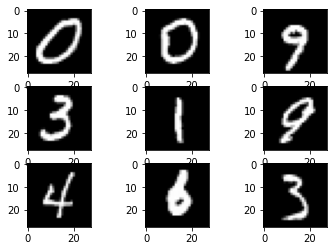

In [39]:
#lets plot it, see the images
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [0]:
class NeuralNet(nn.Module):
  def __init__(self,input_size,hidden_size,num_classes):
    super(NeuralNet, self).__init__()
    self.input_size = input_size
    self.l1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.l2 = nn.Linear(hidden_size, num_classes) #input size is hidden size, output is number of lcasses

  def forward(self,x):
    out = self.l1(x)
    out = self.relu(out)
    out = self.l2(out)
    return out
    #we dont apply softmax here, as we will use cross entropy, which will apply softmax for us

model = NeuralNet(input_size, hidden_size, num_classes)

In [0]:
# loss and optimizer
criterion  = nn.CrossEntropyLoss() #thats why we dont use it in forward
optimizer = torch.optim.Adam(model.parameters(), lr=learninig_rate)


In [43]:
# traininig loop
n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images,labels) in enumerate(train_loader):
    # We need to reshape images 100, 1, 28, 28
    # We need to make 784
    # 100, 784
    images = images.reshape(-1,28*28)
    labels = labels

    # forward pass
    outputs = model(images)
    loss = criterion(outputs, labels)

    # backward pass
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #lets print loss
    if(i+1) % 100 == 0:
      print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')


epoch 1 / 2, step 100/600, loss = 0.5271
epoch 1 / 2, step 200/600, loss = 0.2808
epoch 1 / 2, step 300/600, loss = 0.1726
epoch 1 / 2, step 400/600, loss = 0.1999
epoch 1 / 2, step 500/600, loss = 0.2398
epoch 1 / 2, step 600/600, loss = 0.1471
epoch 2 / 2, step 100/600, loss = 0.1553
epoch 2 / 2, step 200/600, loss = 0.1887
epoch 2 / 2, step 300/600, loss = 0.2687
epoch 2 / 2, step 400/600, loss = 0.1777
epoch 2 / 2, step 500/600, loss = 0.1476
epoch 2 / 2, step 600/600, loss = 0.1502


In [47]:
# test
with torch.no_grad():
  n_correct = 0
  n_samples = 0
  for images, labels in test_loader:
    images = images.reshape(-1,28*28)
    labels = labels
    outputs = model(images)

    # max. will return values, and index - so we want index, as it's waht we need
    _,predictions = torch.max(outputs,1)
    n_samples += labels.shape[0]
    n_correct += (predictions == labels).sum().item() #so each rorrect prediction will add one
 
  accuracy = 100* n_correct / n_samples
  print(f'Accuracy = {accuracy}')

Accuracy = 95.24


In [0]:
# Next CNN